<a href="https://colab.research.google.com/github/FrankAlvaradoR/AI/blob/main/Red_Neuronal_1_Digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -q tfds-nightly

In [65]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)

TensorFlow version: 2.12.0
TensorFlow Datasets version:  4.9.2+nightly


In [56]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos MNIST y obtener la información del conjunto de entrenamiento
datos, informacion = tfds.load('mnist', split='train', with_info=True, as_supervised=True)


10000

In [37]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos MNIST y obtener la información del conjunto de entrenamiento
datos, informacion = tfds.load('mnist', split='train', with_info=True, as_supervised=True)


# Crear listas para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []

# Iterar sobre el conjunto de datos y acceder a los elementos
for ejemplo in datos:
    imagen = ejemplo[0]
    etiqueta = ejemplo[1]

    # Agregar la imagen y la etiqueta a las respectivas listas
    imagenes.append(imagen)
    etiquetas.append(etiqueta)

# Convertir las listas a tensores
imagenes = tf.stack(imagenes)
etiquetas = tf.stack(etiquetas)

In [50]:
imagenes.shape

TensorShape([60000, 28, 28, 1])

In [45]:
class_names = ['0','1', '2', '3','4','5','6','7','8','9']

In [ ]:
plt.figure()
plt.imshow(imagenes[0])
plt.colorbar()
plt.grid(False)
plt.show()

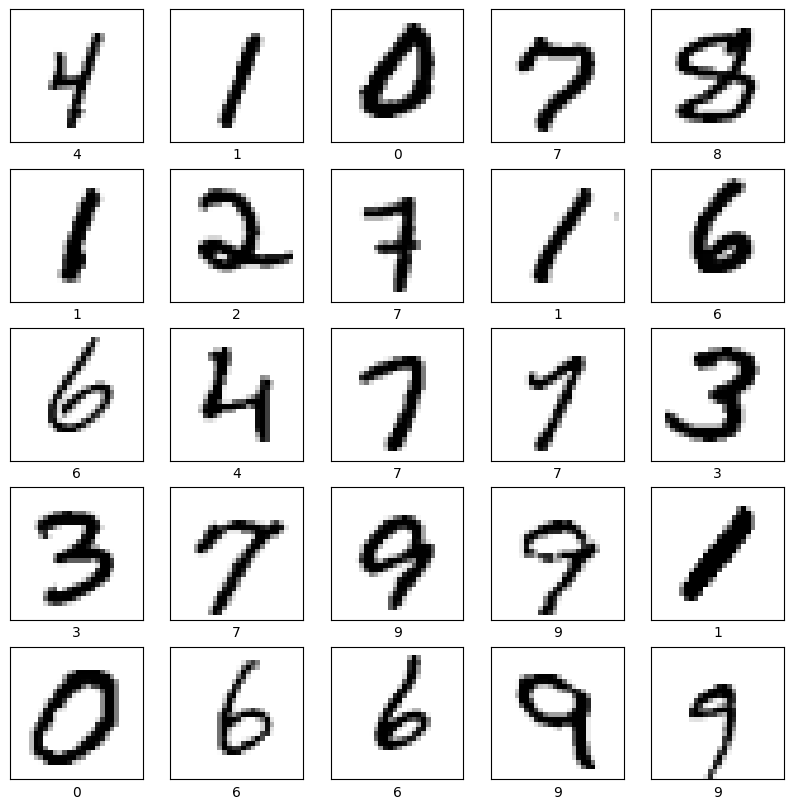

In [46]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[etiquetas[i]])
plt.show()

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(imagenes, etiquetas, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 2.7554 - accuracy: 0.8621
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3805 - accuracy: 0.9131
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2787 - accuracy: 0.9315
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2473 - accuracy: 0.9375
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2246 - accuracy: 0.9432
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2103 - accuracy: 0.9480
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9505
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1911 - accuracy: 0.9534
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1814 - accuracy: 0.9566
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.17

In [57]:
# Cargar el conjunto de datos MNIST y obtener la información del conjunto de entrenamiento
datos, informacion = tfds.load('mnist', split='test', with_info=True, as_supervised=True)


# Crear listas para almacenar las imágenes y las etiquetas
imagenes_test = []
etiquetas_test = []

# Iterar sobre el conjunto de datos y acceder a los elementos
for ejemplo in datos:
    imagen = ejemplo[0]
    etiqueta = ejemplo[1]

    # Agregar la imagen y la etiqueta a las respectivas listas
    imagenes_test.append(imagen)
    etiquetas_test.append(etiqueta)

# Convertir las listas a tensores
imagenes_test = tf.stack(imagenes_test)
etiquetas_test = tf.stack(etiquetas_test)

In [58]:
test_loss, test_acc = model.evaluate(imagenes_test,  etiquetas_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2527 - accuracy: 0.9487 - 749ms/epoch - 2ms/step

Test accuracy: 0.9487000107765198


In [59]:
predictions = model.predict(imagenes_test)

313/313 [==============================] - 1s 2ms/step


In [60]:
predictions[0]

array([1.5762367e-19, 8.5499066e-11, 9.9999464e-01, 4.3226046e-07,
       1.0674599e-10, 8.7889452e-15, 6.9566412e-13, 4.8307602e-06,
       3.0490057e-18, 0.0000000e+00], dtype=float32)

In [66]:
np.argmax(predictions[0])

2

In [68]:
etiquetas_test[0]

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

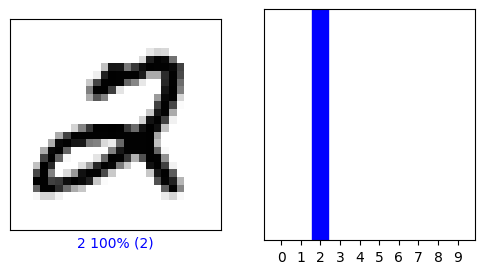

In [70]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], etiquetas_test, imagenes_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  etiquetas_test)
plt.show()

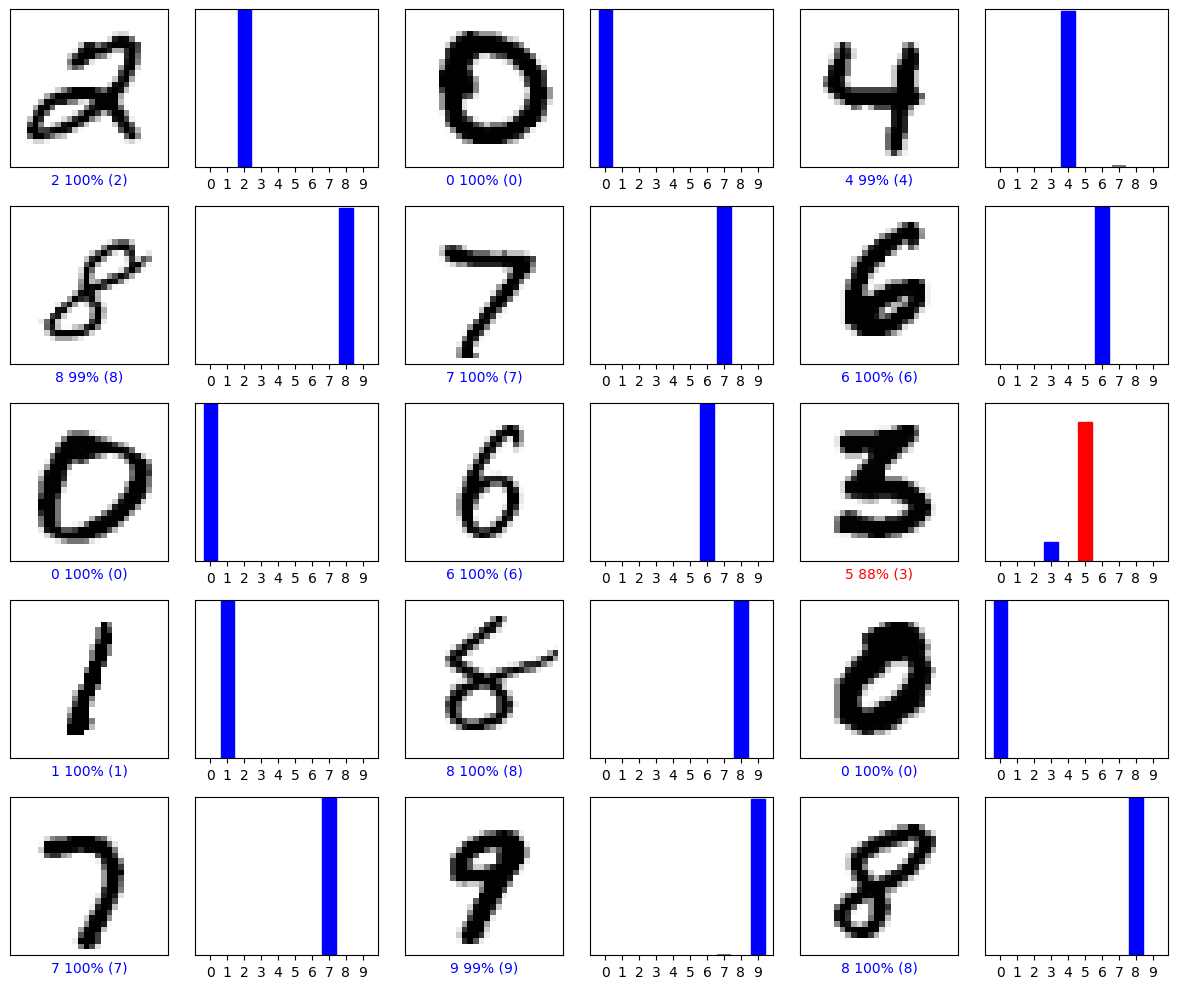

In [72]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], etiquetas_test, imagenes_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], etiquetas_test)
plt.tight_layout()
plt.show()